<a href="https://colab.research.google.com/github/sprasha09/BME450-EpilepticSeizureRecognition/blob/main/SeizureDetection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================================
# Seizure Detection Final Project - BME 450
# By: Sanjana Prashanth and Arwa Neemuchwala
# ================================================

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization
import warnings

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define dataset path
# data = '/content/drive/MyDrive/BME450FinalProject/Epileptic Seizure Recognition.csv'  # Adjust to match downloaded dataset folder
data = '/content/drive/MyDrive/bme 450 /Epileptic Seizure Recognition.csv'  # Adjust to match downloaded dataset folder
df = pd.read_csv(data)

# Displaying the dataset
df.head()

# Removing the Unamed Column (not needed for our analysis)
df.drop('Unnamed', axis=1, inplace=True)
df.isna().sum().sum()
df.duplicated().sum()
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [5]:
# Mapping out the classification defined in the data

class_lab = {

    5: 'eyes open',

    4: 'eyes closed',

    3: 'tumor region identified',

    2: 'EEG from tumor area',

    1: 'seizure activity'

}

df['y'] = df['y'].map(class_lab)

df['y'].head()

,y
0,eyes closed
1,seizure activity
2,eyes open
3,eyes open
4,eyes open


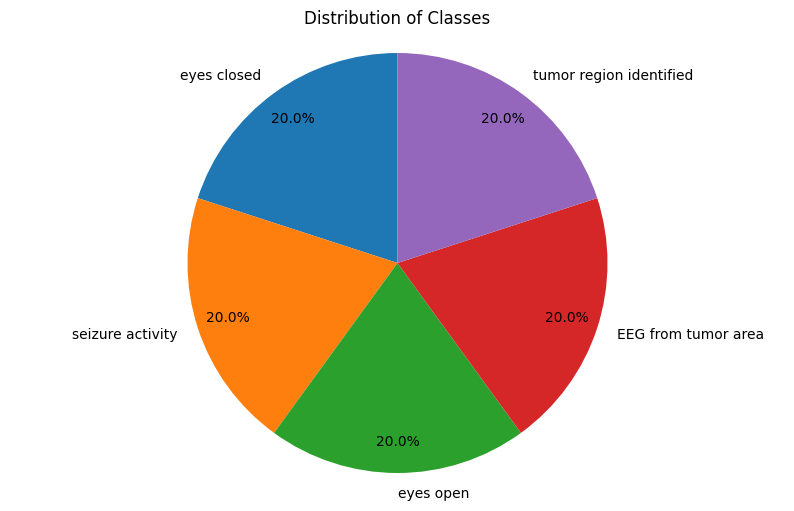

In [6]:
# Count the occurences of each class
value_counts = df['y'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(10,6))

plt.pie(
    value_counts,
    labels = value_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    pctdistance = 0.85
)

# Add a title
plt.title('Distribution of Classes')

#Equal aspect ratio that ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


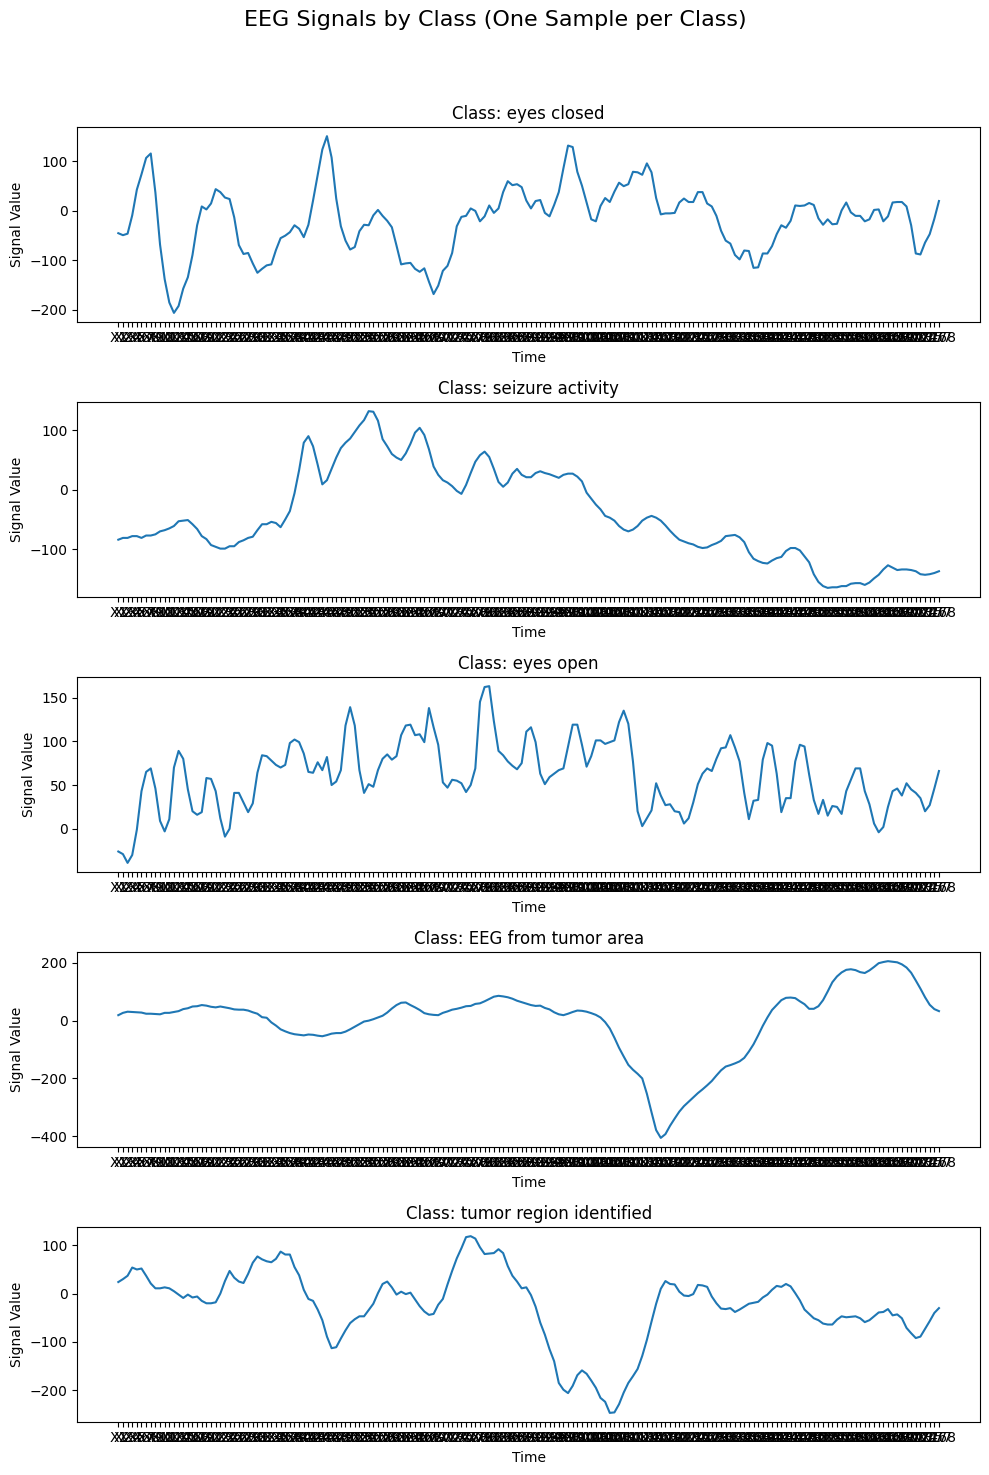

In [10]:
import matplotlib.pyplot as plt

unique_classes = df['y'].unique()

# Create subplots for each class with 1 column
fig, axes = plt.subplots(len(unique_classes), 1, figsize=(10, 3 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize = 16)

# Iterate over each class
for i, class_label in enumerate(unique_classes):

    # Filter the DataFrame for the current class
    class_data = df[df['y'] == class_label]

    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1).drop(columns = 'y')

    # Plot the sample
    axes[i].plot(random_sample.iloc[0,:])
    axes[i].set_title(f'Class: {class_label}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Signal Value')

# Adjust layout and display the plot
plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()
